# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
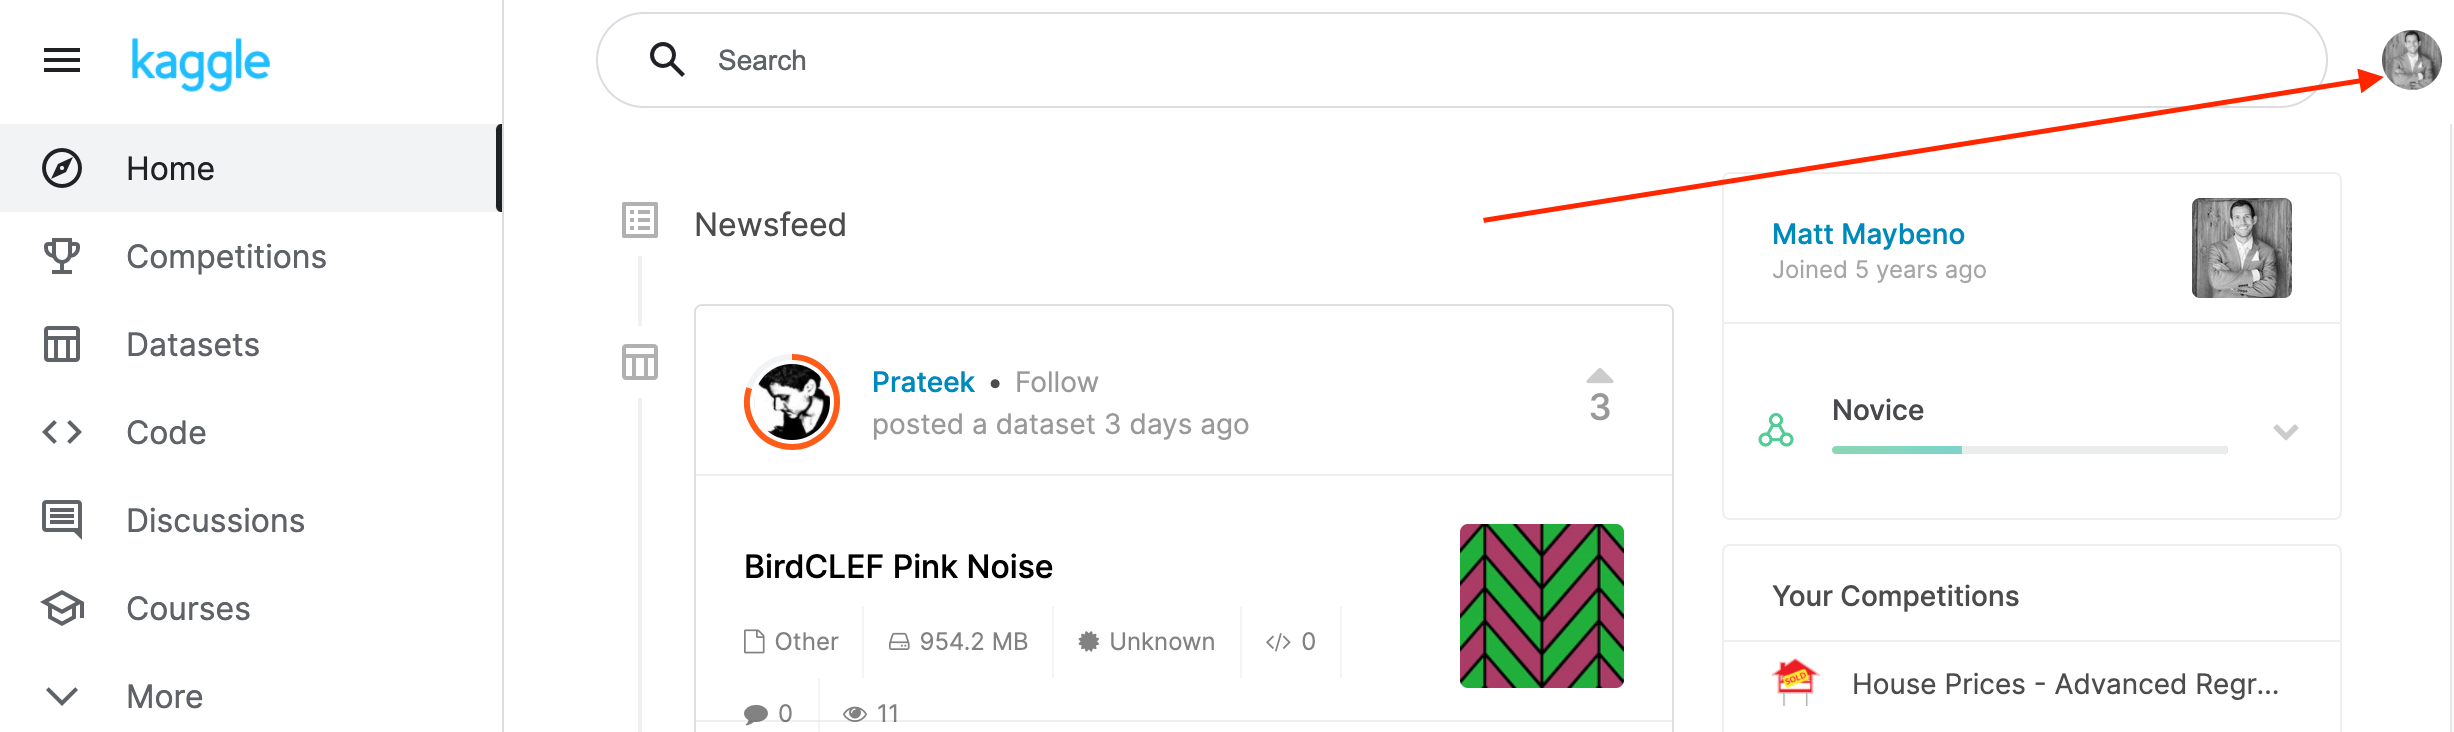
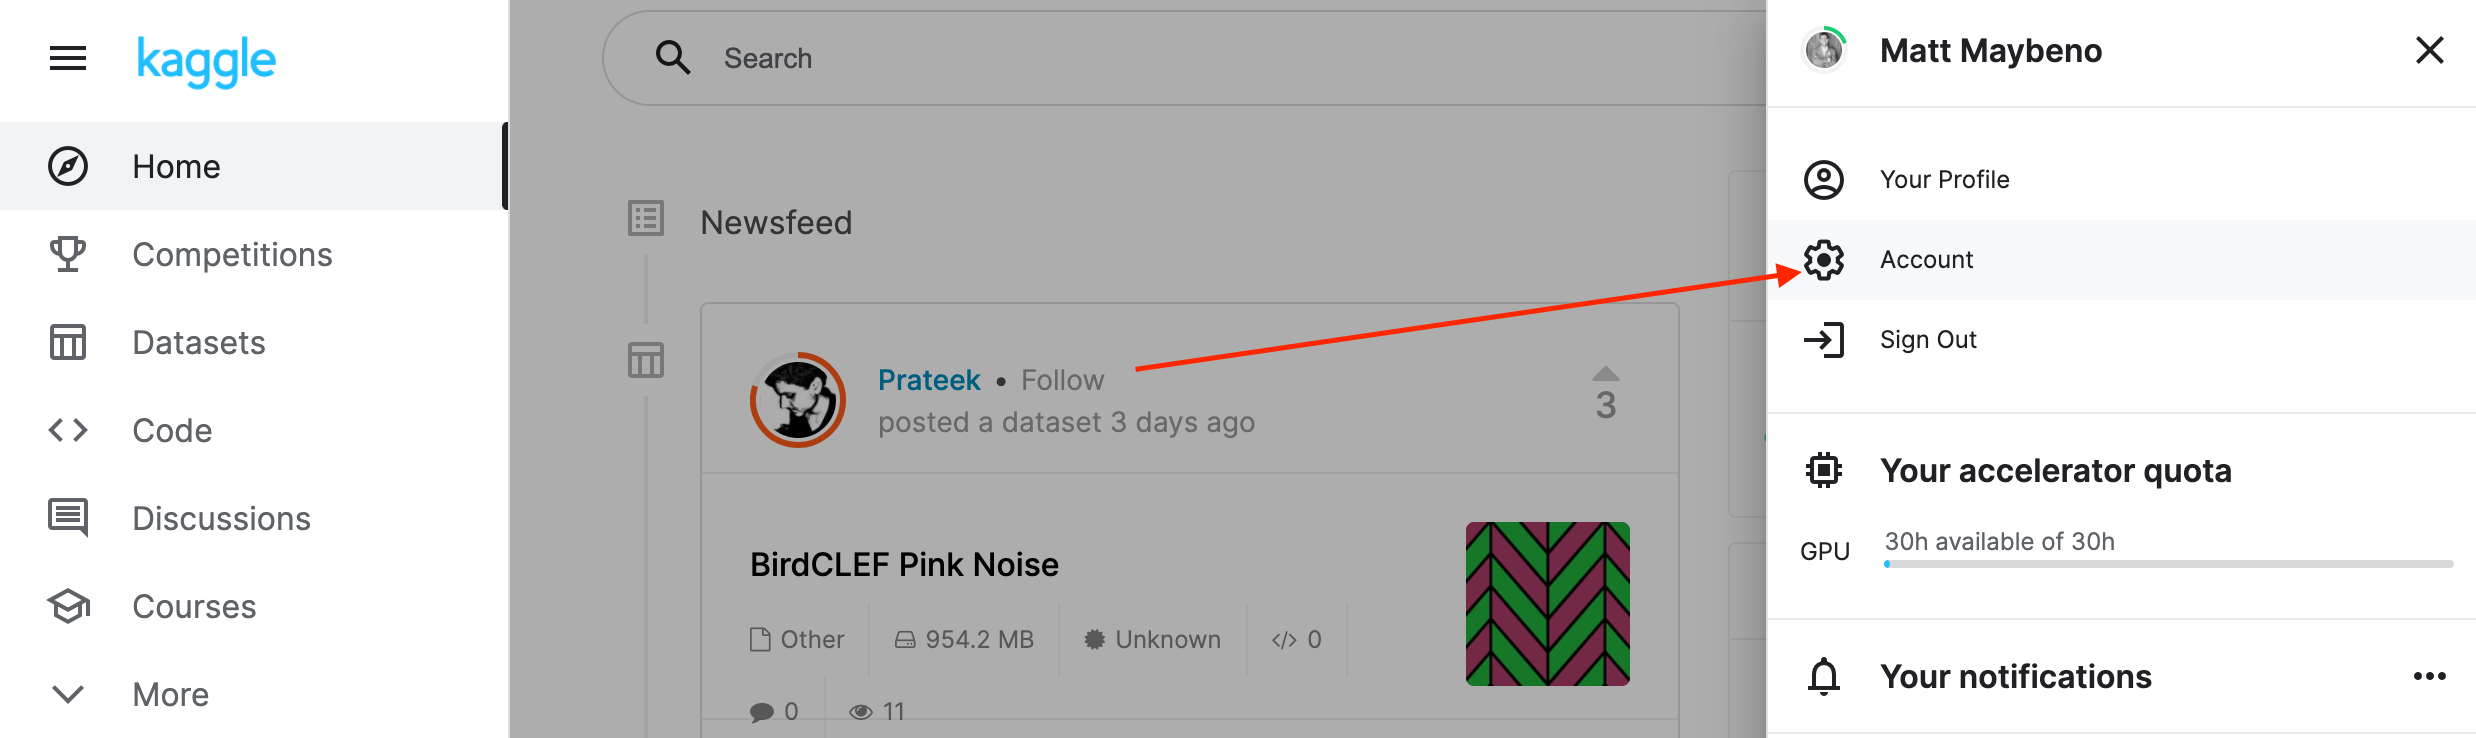
2. Scroll down to API and click Create New API Token.
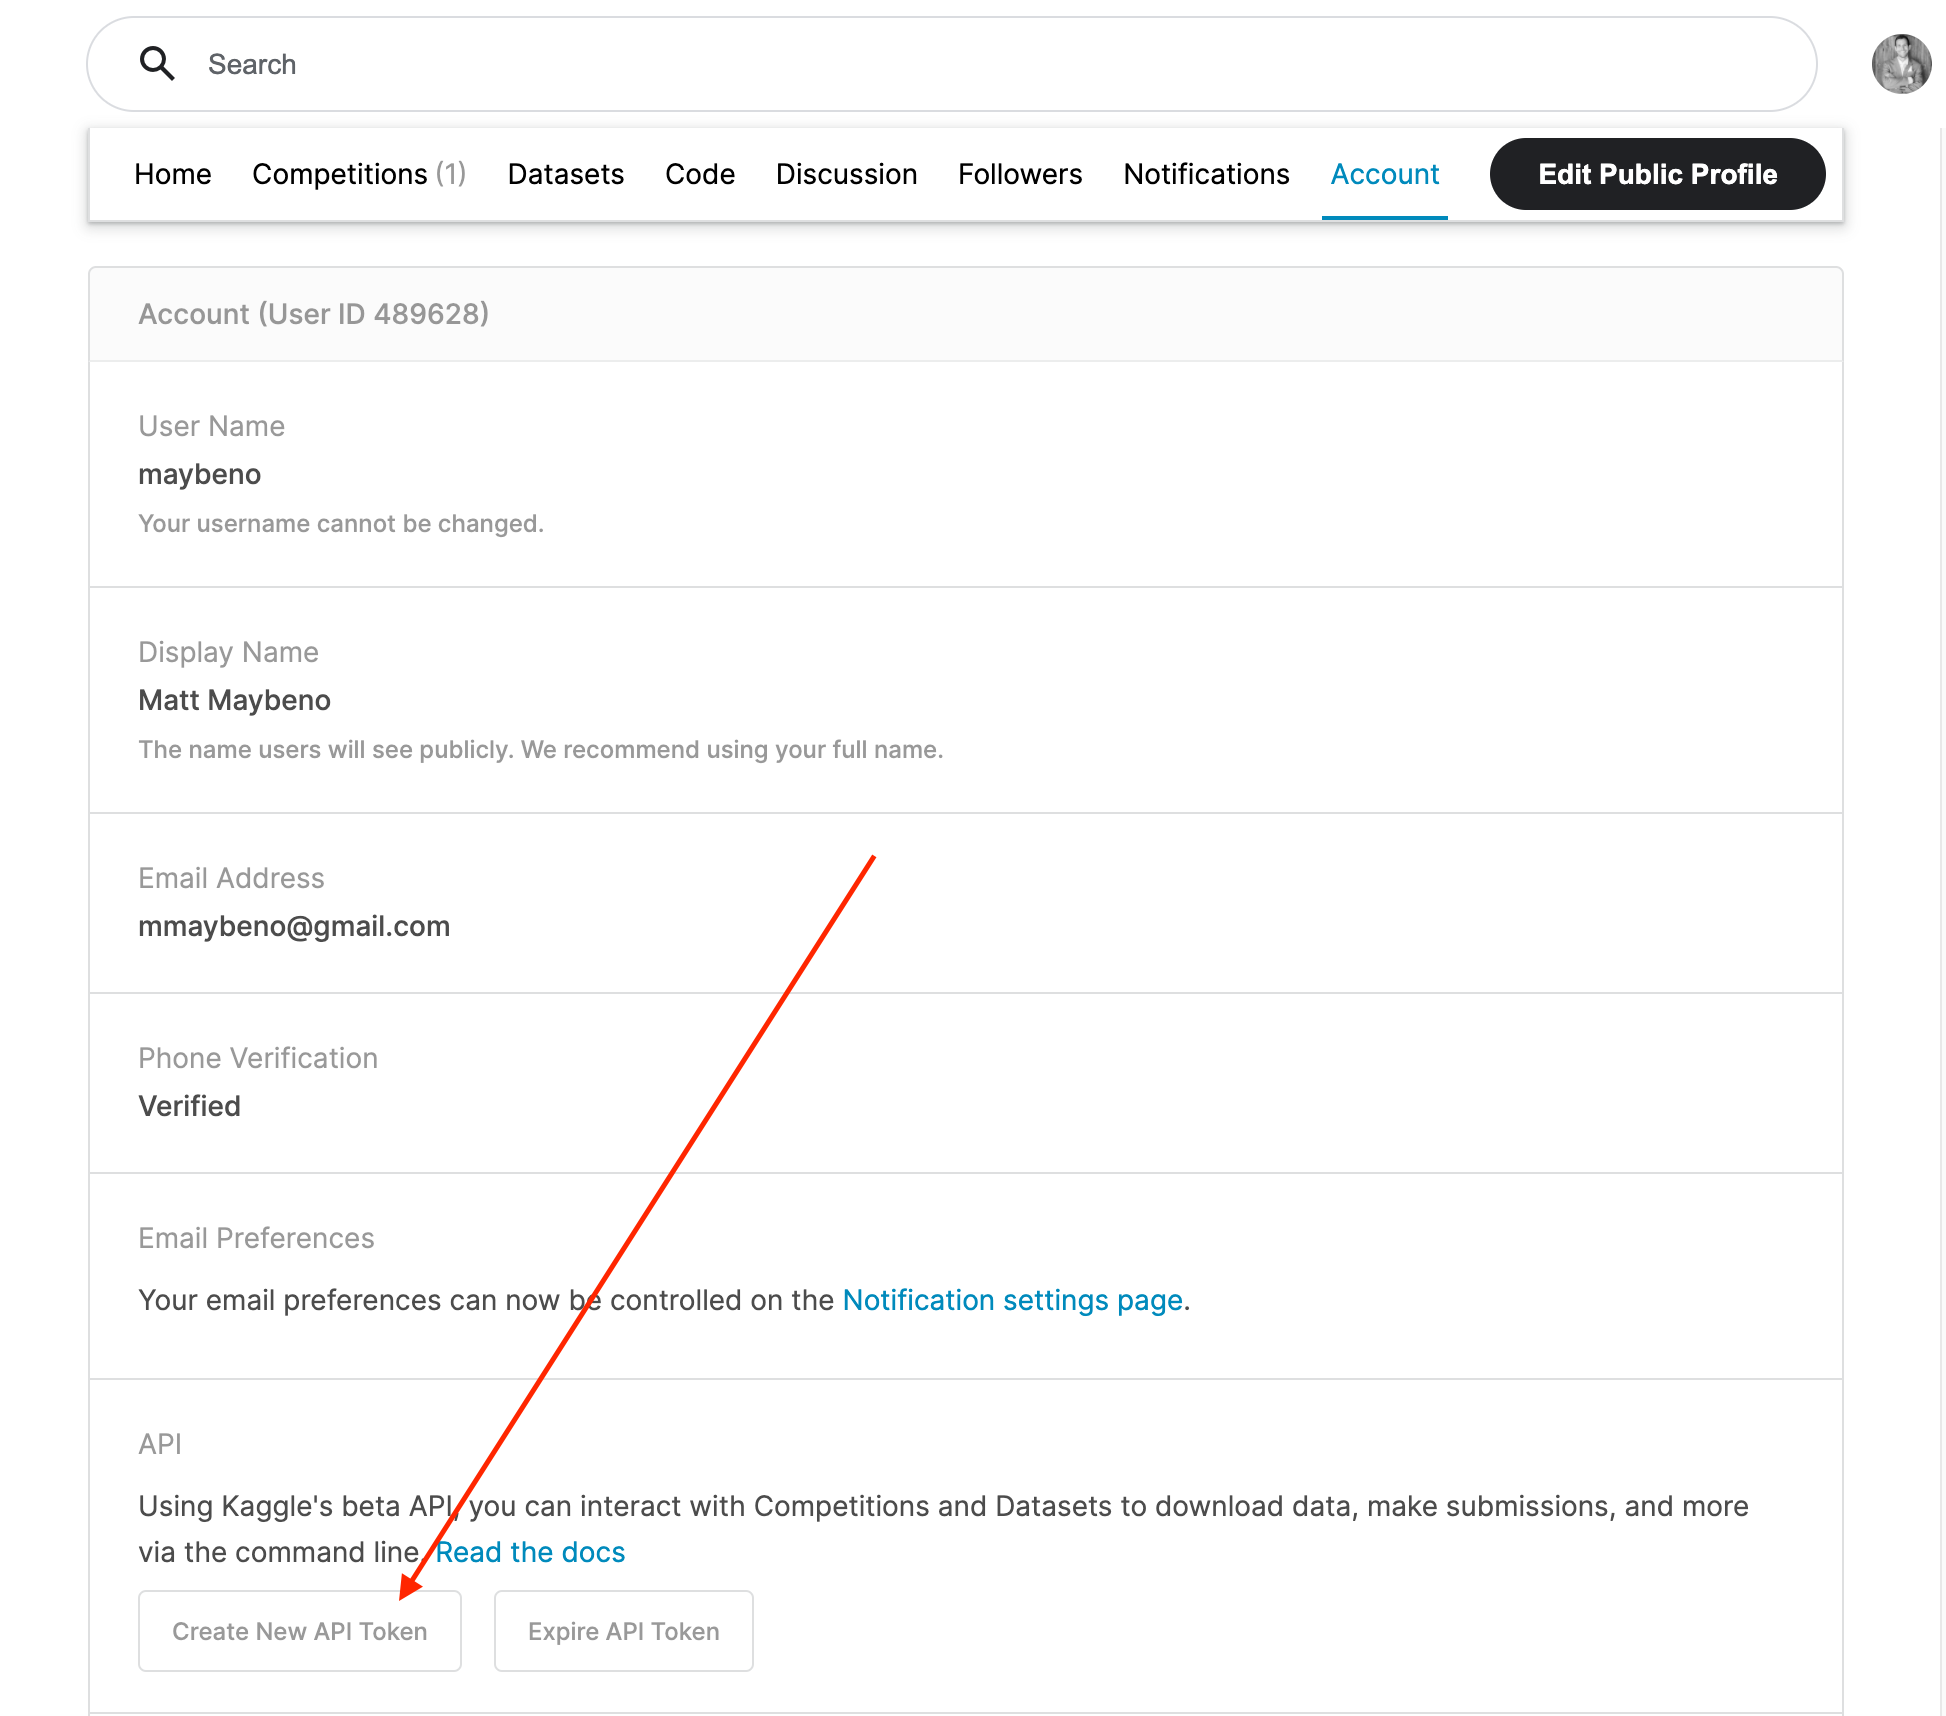
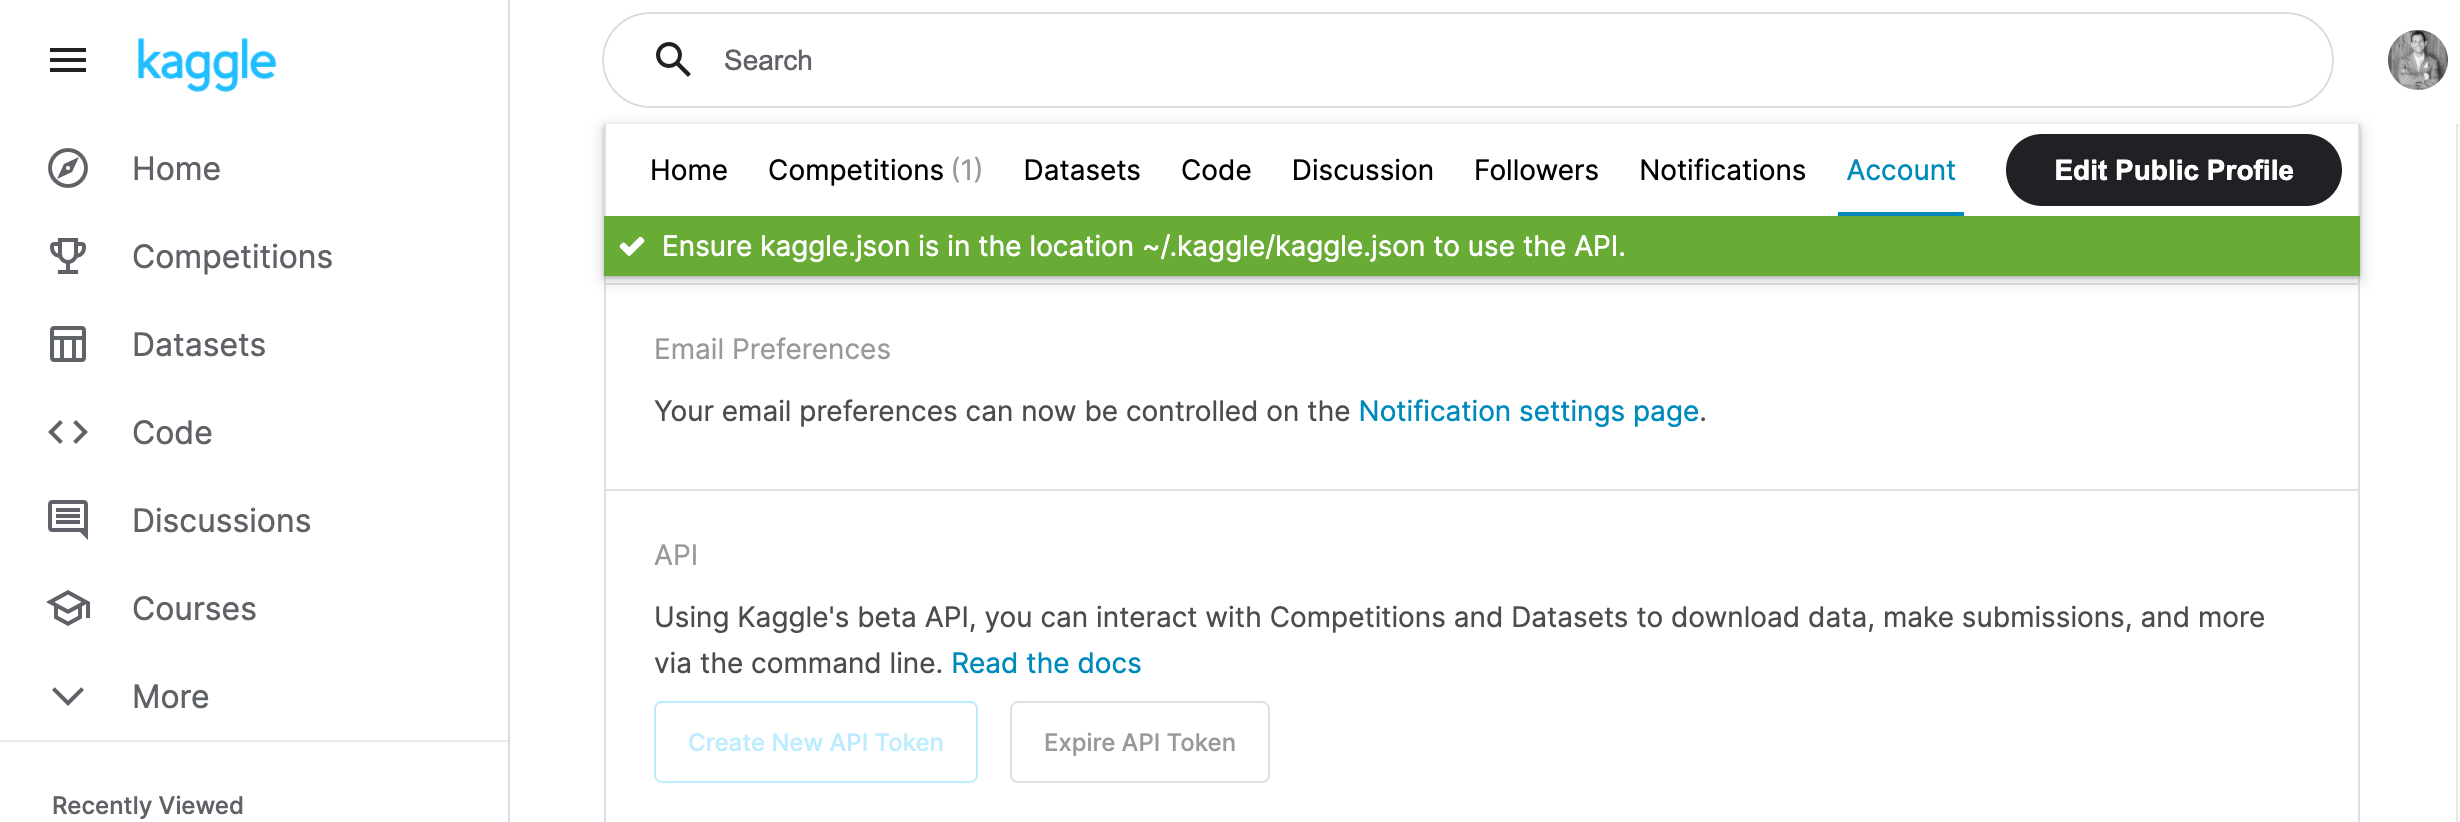
3. Open up `kaggle.json` and use the username and key.
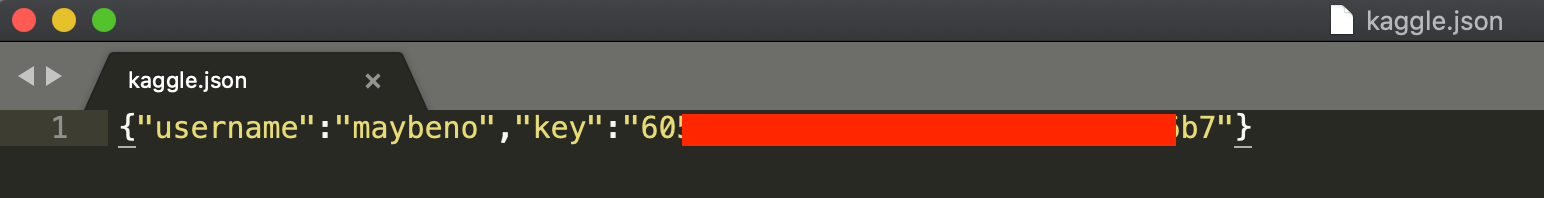

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 177.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 220.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [13]:
!pip install python-dotenv

In [14]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
# !echo "KAGGLE_USERNAME=thurat******98" >> api_token.env
# !echo "KAGGLE_KEY=****" >> api_token.env

In [15]:
from dotenv import dotenv_values

CONFIG = dotenv_values('api_token.env')

kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

In [17]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
# kaggle_username = "*****"
# kaggle_key = "******"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
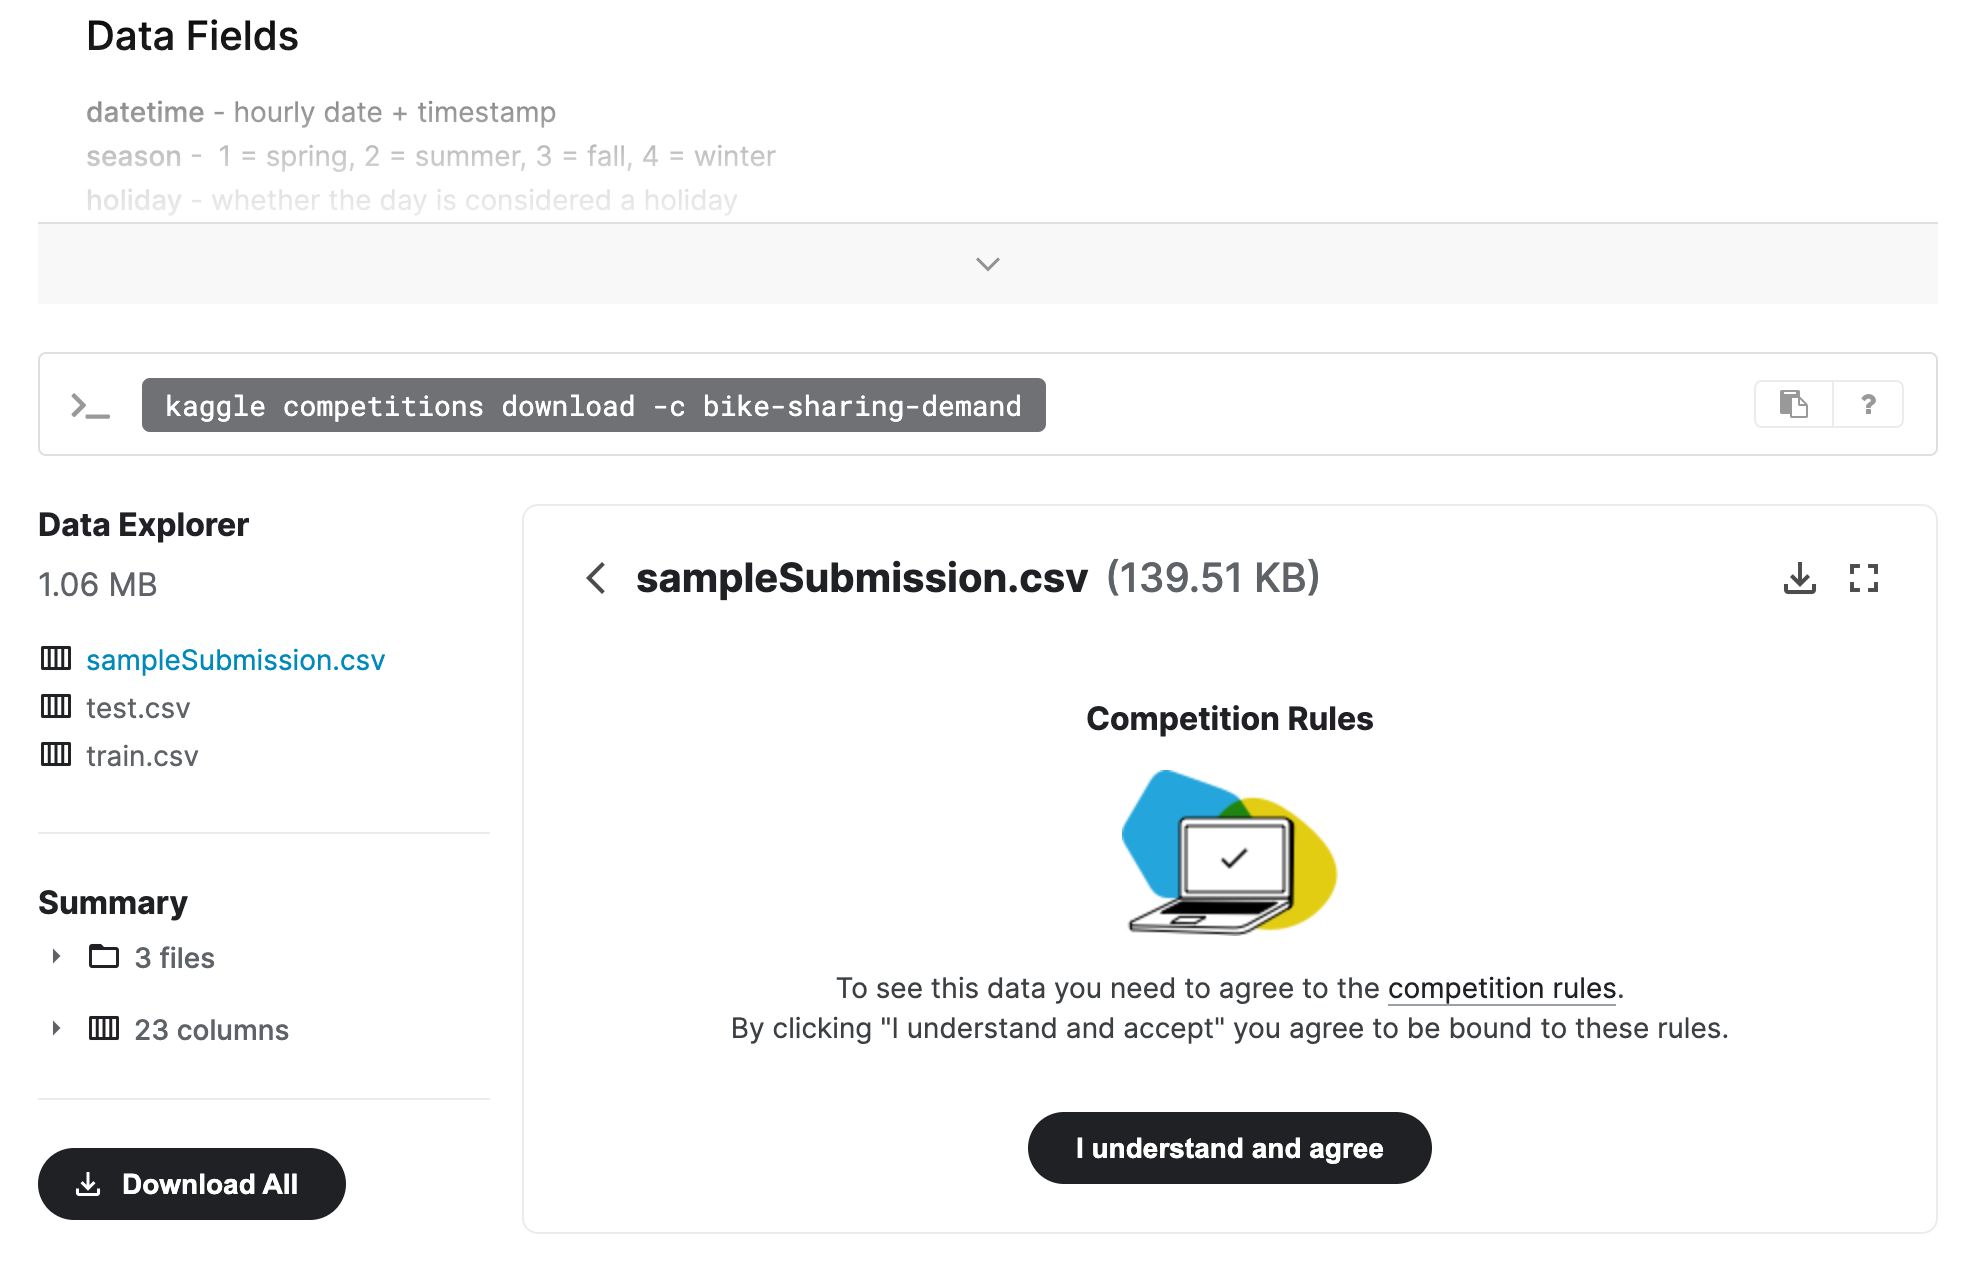

In [18]:
!pip install kaggle

In [19]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [20]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=["datetime"])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [30]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [32]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [33]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [34]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [35]:
# ignore 'casual' and 'registered' columns
predictor = TabularPredictor(
    label="count", 
    problem_type="regression", 
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns":["casual", "registered"]}
).fit(
    train, 
    time_limit=600, 
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230529_050030/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_050030/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2417.41 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

### Review AutoGluon's training run with ranking of models that did the best.

In [36]:
predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.731866      10.931098  450.254377                0.000764           0.343465            3       True         15
1   RandomForestMSE_BAG_L2  -53.281415      10.106937  417.289690                0.595734          26.802905            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.754629      10.097599  398.944832                0.586396           8.458046            2       True         14
3          LightGBM_BAG_L2  -55.106062       9.748204  414.649962                0.237001          24.163176            2       True         11
4          CatBoost_BAG_L2  -55.714433       9.586119  454.202219                0.074916          63.715433            2       True         13
5        LightGBMXT_BAG_L2  -60.253320      12.540678  442.046088         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

In [38]:
# Show properties of predictors
# predictor.leaderboard(extra_info=True, silent=True)

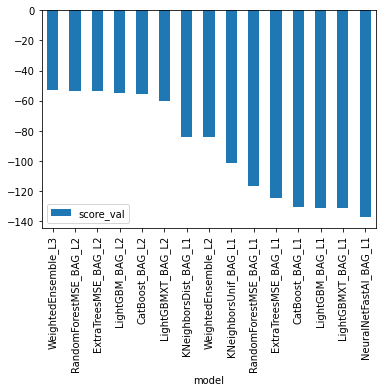

In [40]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

### Create predictions from test dataset

In [42]:
predictions = predictor.predict(test)
predictions.head()

0    23.676319
1    41.503437
2    45.090218
3    48.690903
4    51.627548
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [43]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.652985
std        90.211586
min         3.105110
25%        20.758205
50%        63.265308
75%       169.503662
max       365.779480
Name: count, dtype: float64

In [46]:
# How many negative values do we have?
negative_values_count = 0

for value in predictions:
    if value < 0:
        negative_values_count += 1

print("Negative values in predictions: ", negative_values_count)

Negative values in predictions:  0


In [47]:
# Set them to zero
if negative_values_count > 0:
    predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [48]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 319kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-29 05:24:25  first raw submission               complete  1.80870      1.80870       
submission_new_hpo.csv       2023-05-28 12:55:25  new features with hyperparameters  complete  0.68806      0.68806       
submission_new_hpo.csv       2023-05-28 12:30:23  new features with hyperparameters  complete  0.67053      0.67053       
submission_new_hpo.csv       2023-05-28 12:05:39  new features with hyperparameters  complete  0.70201      0.70201       


#### Initial score of `1.80870` after Review!

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

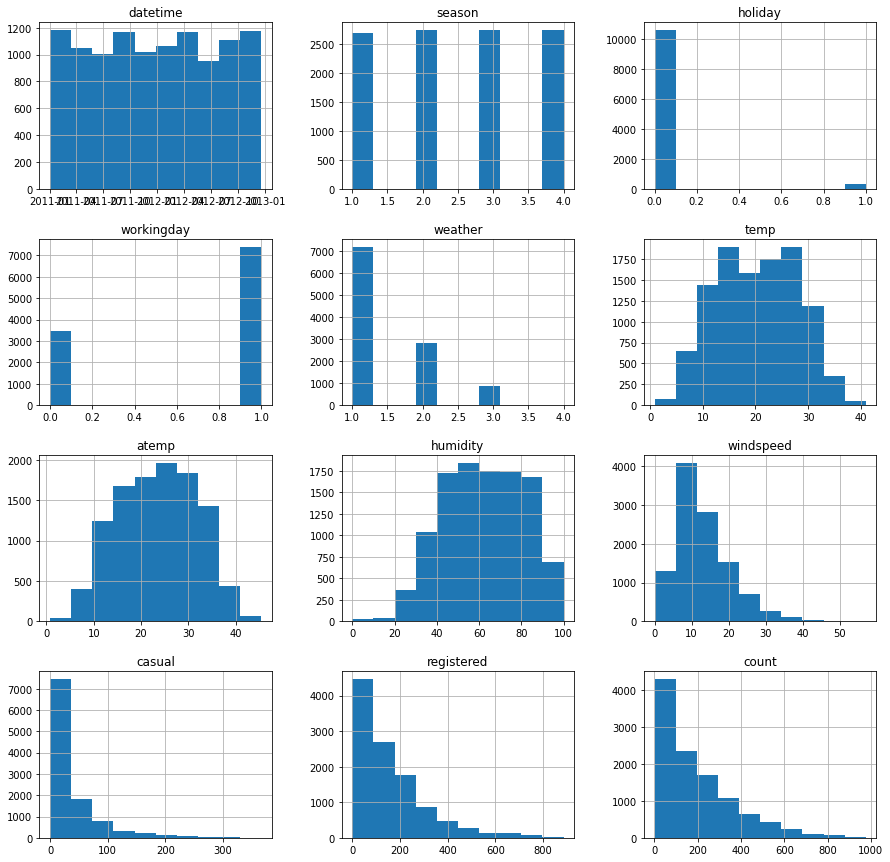

In [54]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 15));

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [56]:
# change datetime's type from object to datettime
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])

In [58]:
# verify datetime dtype
# train.info()

In [59]:
# create a new feature
# to train
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['dayofweek'] = train.datetime.dt.dayofweek
# to test
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['dayofweek'] = test.datetime.dt.dayofweek

In [60]:
# train.info()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [61]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [62]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   dayofweek  
0          5  
1          5  
2          5  
3          5  
4          5

In [65]:
# Check Dtype
train.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
dayofweek              int64
dtype: object

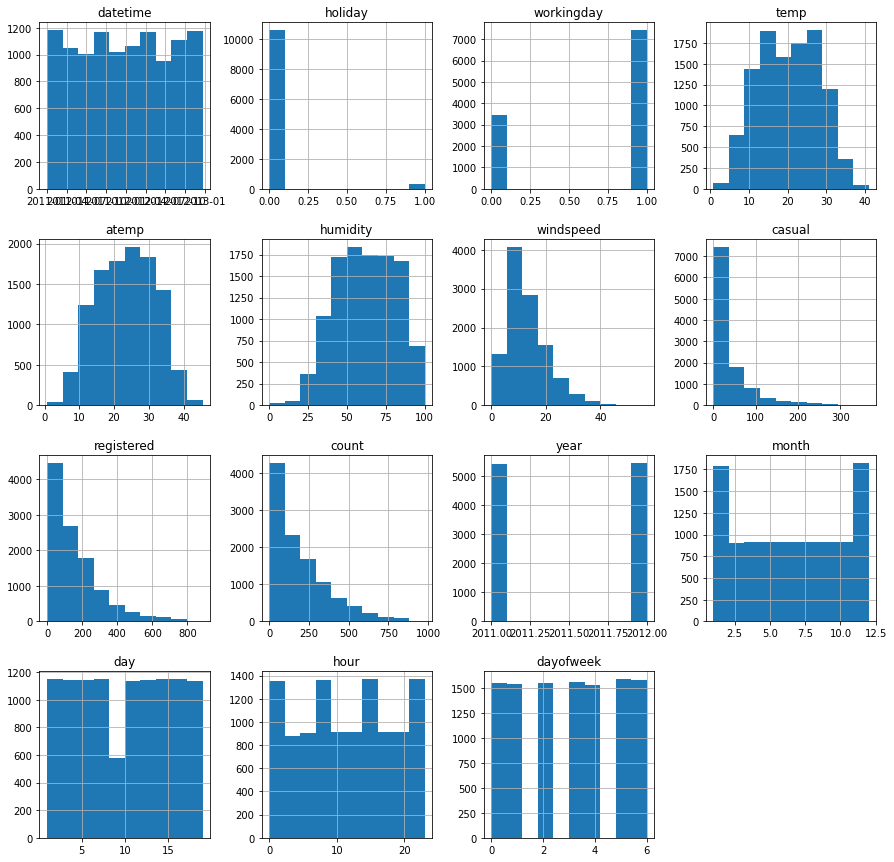

In [66]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 15));

## Step 5: Rerun the model with the same settings as before, just with more features

In [164]:
predictor_new_features = TabularPredictor(
    label="count", 
    problem_type="regression", 
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns":["casual", "registered"]}
).fit(
    train, 
    time_limit=600, 
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230529_091950/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230529_091950/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1682.45 MB
	Train Data (Original)  Memory Usage: 1.07 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [68]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.282121      16.072556  558.802853                0.000809           0.292861            3       True         14
1          CatBoost_BAG_L2  -30.581748      14.389741  471.197474                0.116868          71.102150            2       True         13
2          LightGBM_BAG_L2  -30.655252      14.657438  426.326742                0.384565          26.231417            2       True         11
3        LightGBMXT_BAG_L2  -31.340771      14.958980  428.887392                0.686107          28.792068            2       True         10
4   RandomForestMSE_BAG_L2  -31.655413      14.884207  432.384357                0.611334          32.289033            2       True         12
5      WeightedEnsemble_L2  -32.068217      13.087394  349.064197         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.277207057251985,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.32

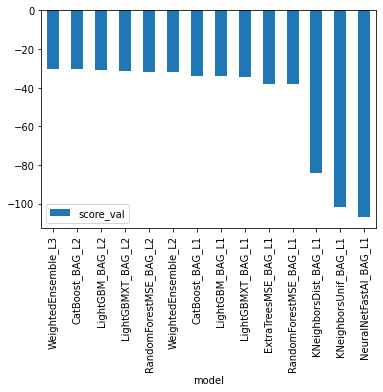

In [69]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [70]:
# Predict on the test set
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features

0        16.419174
1        11.280539
2        11.223225
3         9.483505
4         8.285756
           ...    
6488    279.167236
6489    207.656128
6490    152.502594
6491    110.536575
6492     71.671432
Name: count, Length: 6493, dtype: float32

In [71]:
# How many negative values do we have?
negative_values_count = 0

for value in predictions_new_features:
    if value < 0:
        negative_values_count += 1

print(negative_values_count)

0


In [72]:
# Remember to set all negative values to zero
if negative_values_count > 0:
    predictions_new_features.iloc[predictions_new_features < 0] = 0

In [73]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 336kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-29 05:53:17  new features                       complete  0.67806      0.67806       
submission.csv               2023-05-29 05:24:25  first raw submission               complete  1.80870      1.80870       
submission_new_hpo.csv       2023-05-28 12:55:25  new features with hyperparameters  complete  0.68806      0.68806       
submission_new_hpo.csv       2023-05-28 12:30:23  new features with hyperparameters  complete  0.67053      0.67053       


#### New Score of `0.67806` after Review!

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [152]:
import autogluon.core as ag


nn_options = {  
    'num_epochs': 15,  # 10, 10, 15, 15
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-3, log=True),  
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  
}


gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models) 50, 50, 100
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = { 
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  
                  }  


num_trials = 6  # 4, 4, 8, 8, 6
search_strategy = 'random'  # 'auto', 'random'
num_folds = 12 # 5, 5, 9, 9, 12


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [154]:
predictor_new_hpo = TabularPredictor(
    label="count", 
    problem_type="regression", 
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns":["casual", "registered"]}
).fit(
    train, 
    time_limit=900, 
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Repeating k-fold bagging: 2/20
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 273.59s of the 273.56s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-35.4805	 = Validation score   (-root_mean_squared_error)
	41.96s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 248.61s of the 248.59s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-35.2085	 = Validation score   (-root_mean_squared_error)
	41.31s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T3 ... Training model for up to 225.94s of the 225.92s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-35.3262	 = Validation score   (-root_mean_squared_error)
	43.3

In [155]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                                model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0                 WeightedEnsemble_L3  -35.086732       1.397276  440.973608                0.000821           0.448600            3       True         15
1                  LightGBM_BAG_L2/T2  -35.208520       1.216760  397.218282                0.126991          41.307061            2       True         10
2                  LightGBM_BAG_L2/T3  -35.326153       1.269464  399.217947                0.179695          43.306725            2       True         11
3                  LightGBM_BAG_L2/T1  -35.480490       1.248559  397.870241                0.158790          41.959019            2       True          9
4                  LightGBM_BAG_L2/T5  -36.094041       1.231225  398.258381                0.141457          42.347160            2       True         13
5       

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/cff98_00000': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -39.781870972867736,
  'LightGBM_BAG_L1/T2': -38.24524238792664,
  'LightGBM_BAG_L1/T3': -37.91925804902017,
  'LightGBM_BAG_L1/T4

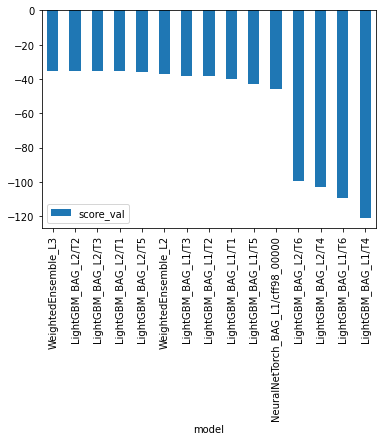

In [156]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [157]:
# Predict on the test set
predictions_new_hypo = predictor_new_hpo.predict(test)
predictions_new_hypo

0        10.671464
1         6.517012
2         6.514175
3         6.508682
4         6.508682
           ...    
6488    352.651672
6489    233.271057
6490    172.714172
6491    119.074966
6492     76.898018
Name: count, Length: 6493, dtype: float32

In [158]:
# Remember to set all negative values to zero

# How many negative values do we have?
negative_values_count = 0

for value in predictions_new_hypo:
    if value < 0:
        negative_values_count += 1

print(negative_values_count)

# Remember to set all negative values to zero
if negative_values_count > 0:
    predictor_new_hpo.iloc[predictor_new_hpo < 0] = 0

0


In [159]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hypo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [160]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 438kB/s]
Successfully submitted to Bike Sharing Demand

In [161]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-29 09:11:05  new features with hyperparameters  complete  0.47240      0.47240       
submission_new_hpo.csv       2023-05-29 08:33:15  new features with hyperparameters  complete  0.46291      0.46291       
submission_new_hpo.csv       2023-05-29 08:07:38  new features with hyperparameters  complete  0.47889      0.47889       
submission_new_hpo.csv       2023-05-29 07:54:29  new features with hyperparameters  complete  1.26499      1.26499       
submission_new_hpo.csv       2023-05-29 07:48:49  new features with hyperparameters  complete  0.57451      0.57451       
submission_new_features.csv  2023-05-29 05:53:17  new features                       complete  0.67806      0.67806       
submission.csv  

#### New Score of `0.47240` after Review!

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

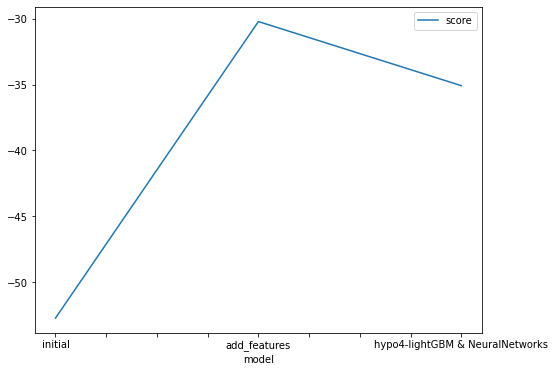

In [170]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hypo4-lightGBM & NeuralNetworks"],
        "score": [predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

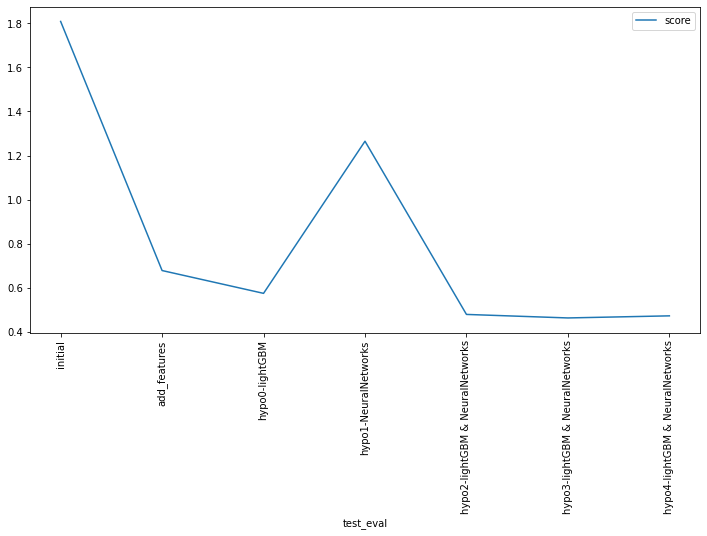

In [173]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hypo0-lightGBM", "hypo1-NeuralNetworks","hypo2-lightGBM & NeuralNetworks", "hypo3-lightGBM & NeuralNetworks", "hypo4-lightGBM & NeuralNetworks"],
        "score": [1.80870, 0.67806, 0.57451, 1.26499, 0.47889, 0.46291, 0.47240]
    }
).plot(x="test_eval", y="score", rot=90, figsize=(12, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [179]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hypo0-lightGBM", "hypo1-NeuralNetworks","hypo2-lightGBM & NeuralNetworks", "hypo3-lightGBM & NeuralNetworks", "hypo4-lightGBM & NeuralNetworks"],
    "time_limit": [600, 600, 600, 600, 600, 900, 900],
    "presets": ['best_quality', 'best_quality', 'best_quality', 'best_quality', 'best_quality', 'high_quality','best_quality'],
    "num_epochs": ['default', 'default', 'default', 10, 15, 15, 15],
    "num_boost_round": ['default', 'default', 50, 'default', 100, 100, 100],
    "num_trials": ['default', 'default', 4, 4, 8, 8, 6],
    "num_folds": ['default', 'default', 5, 5, 9, 9, 12],
    "searcher": ['default', 'default', 'auto', 'auto', 'random', 'random', 'random'],
    "score": [1.80870, 0.67806, 0.57451, 1.26499, 0.47889, 0.46291, 0.47240]
})

model  time_limit       presets num_epochs  \
0                          initial         600  best_quality    default   
1                     add_features         600  best_quality    default   
2                   hypo0-lightGBM         600  best_quality    default   
3             hypo1-NeuralNetworks         600  best_quality         10   
4  hypo2-lightGBM & NeuralNetworks         600  best_quality         15   
5  hypo3-lightGBM & NeuralNetworks         900  high_quality         15   
6  hypo4-lightGBM & NeuralNetworks         900  best_quality         15   

  num_boost_round num_trials num_folds searcher    score  
0         default    default   default  default  1.80870  
1         default    default   default  default  0.67806  
2              50          4         5     auto  0.57451  
3         default          4         5     auto  1.26499  
4             100          8         9   random  0.47889  
5             100          8         9   random  0.46291  
6             100          6        12   random  0.47240